In [59]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import solve_ivp
from numpy.linalg import norm
import math

In [288]:
def system(t, y):
    dy = [(3*y[1] - y[0]), 
        (-y[1]-3*y[0])]
    return np.array(dy)

In [289]:
def rk3singlestep(fun, dt, t0, y0):
    f1 = fun(t0, y0)
    f2 = fun(t0 + dt / 3, y0 + (dt / 3) * f1)
    f3 = fun(t0 + 2*(dt / 3), y0 + 2*(dt / 3) * f2)
    yout = y0 + (dt / 4) * (f1 + 0 * f2 + 3 * f3)
    return yout

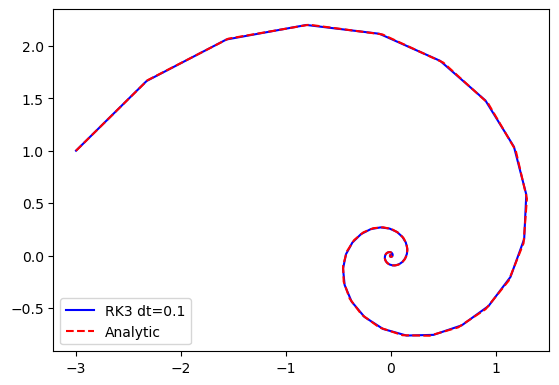

In [290]:
# Initial condition
y0 = [-3.0, 1.0]

# Compute trajectory 
dt = .1
T = 10
num_time_pts = int(T / dt)
t = np.linspace(0, T, num_time_pts)
#t=np.arange(0,T,dt)
Y = np.zeros((2, num_time_pts))
Y[:, 0] = y0
yin = y0
for i in range(num_time_pts - 1):
    yout = rk3singlestep(system, dt, t[i], yin)
    Y[:, i + 1] = yout
    yin = yout

ax = plt.figure().add_subplot()

ax.plot(Y[0, :], Y[1, :], 'b',label=str("RK3 dt="+str(dt)))

solution = solve_ivp(system, (0, T), y0, t_eval=t)
t = solution.t
y = solution.y.T
ax.plot(y[:, 0], y[:, 1], 'r', linestyle="dashed", label="Analytic")
ax.legend()
plt.gca().set_aspect('equal')
plt.show()

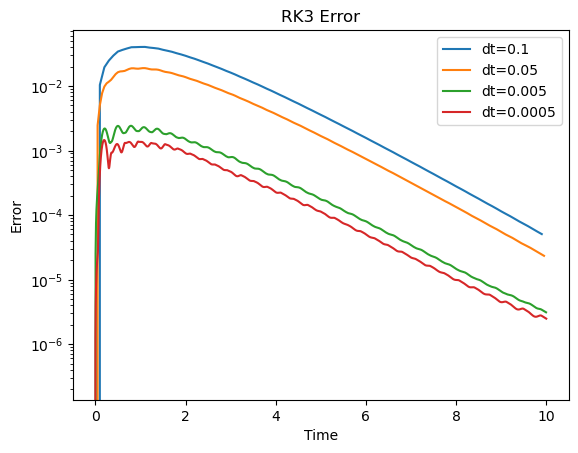

In [291]:
"""
Error for each dt
"""
y0 = [-3.0, 1.0]
dts=[0.1,0.05,0.005,0.0005]
err = []
for dti in dts:
    num_time_pts = int(T / dti)
    t = np.linspace(0, T, num_time_pts)
    Y = np.zeros((2, num_time_pts))
    Y[:, 0] = y0
    yin = y0
    for i in range(num_time_pts - 1):
        yout = rk3singlestep(system, dti, t[i], yin)
        Y[:, i + 1] = yout
        yin = yout
    solution = solve_ivp(system, (0, T), y0, t_eval=t)
    t = solution.t
    y = solution.y.T
    err.append([y[:,0]-Y[0,:],y[:,1]-Y[1,:]])


for i in range(len(err)):
    err[i] = norm(err[i],axis=0,ord=2)


ax = plt.figure().add_subplot()
ax.semilogy(np.arange(0,10,0.1),err[0],label="dt=0.1")
ax.semilogy(np.arange(0,10,0.05),err[1],label="dt=0.05")
ax.semilogy(np.arange(0,10,0.005),err[2],label="dt=0.005")
ax.semilogy(np.arange(0,10,0.0005),err[3],label="dt=0.0005")

ax.legend()
plt.title("RK3 Error")
plt.xlabel("Time")
plt.ylabel("Error")
plt.show()

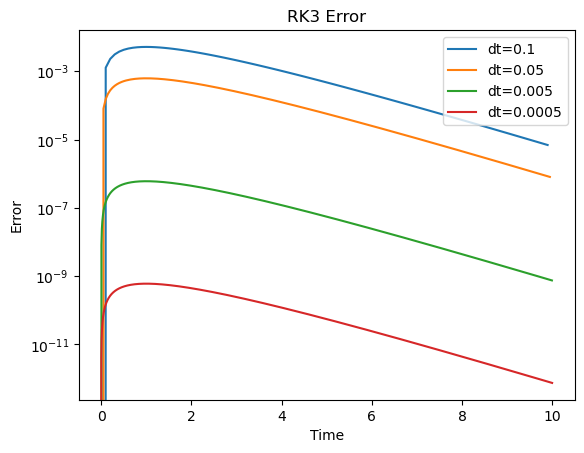

In [292]:
def analytic(t):
    x1=math.exp(-t)*(-3*math.cos(3*t)+math.sin(3*t))
    x2=math.exp(-t)*(3*math.sin(3*t)+math.cos(3*t))
    return np.array([x1,x2])

y0 = [-3.0, 1.0]
dts=[0.1,0.05,0.005,0.0005]
err = []
for dti in dts:
    num_time_pts = int(T / dti)
    t = np.linspace(0, T, num_time_pts)
    Y = np.zeros((2, num_time_pts))
    Y[:, 0] = y0
    yin = y0
    for i in range(num_time_pts - 1):
        yout = rk3singlestep(system, dti, t[i], yin)
        Y[:, i + 1] = yout
        yin = yout
    y = np.array([analytic(k) for k in np.arange(0,10,dti)])
    err.append([y[:,0]-Y[0,:],y[:,1]-Y[1,:]])


for i in range(len(err)):
    err[i] = norm(err[i],axis=0)


ax = plt.figure().add_subplot()
ax.semilogy(np.arange(0,10,0.1),err[0],label="dt=0.1")
ax.semilogy(np.arange(0,10,0.05),err[1],label="dt=0.05")
ax.semilogy(np.arange(0,10,0.005),err[2],label="dt=0.005")
ax.semilogy(np.arange(0,10,0.0005),err[3],label="dt=0.0005")

ax.legend()
plt.title("RK3 Error")
plt.xlabel("Time")
plt.ylabel("Error")
plt.show()

In [297]:
dt = 0.1
err = []
dts=[]
while dt > 0.00001:
    dt /= 2
    num_time_pts = int(T / dt)
    t = np.linspace(0, T, num_time_pts)
    Y = np.zeros((2, num_time_pts))
    Y[:, 0] = y0
    yin = y0
    for i in range(num_time_pts - 1):
        yout = rk3singlestep(system, dt, t[i], yin)
        Y[:, i + 1] = yout
        yin = yout
    solution = solve_ivp(system, (0, T), y0, t_eval=t)
    t = solution.t
    y = solution.y.T
    err.append([norm([y[-1,0]-Y[0,-1],y[-1,1]-Y[1,-1]],axis=0),dt])
    dts.append(dt)

In [312]:
dt = 0.1
err = []
while dt > 0.00001:
    dt /= 2
    num_time_pts = int(T / dt)
    t = np.linspace(0, T, num_time_pts)
    Y = np.zeros((2, num_time_pts))
    Y[:, 0] = y0
    yin = y0
    for i in range(num_time_pts - 1):
        yout = rk3singlestep(system, dt, t[i], yin)
        Y[:, i + 1] = yout
        yin = yout
    y = np.array([analytic(k) for k in np.arange(0,10,dt)])
    err.append([norm([y[0,0]-Y[0,0],y[1,1]-Y[1,1]],axis=0),dt])

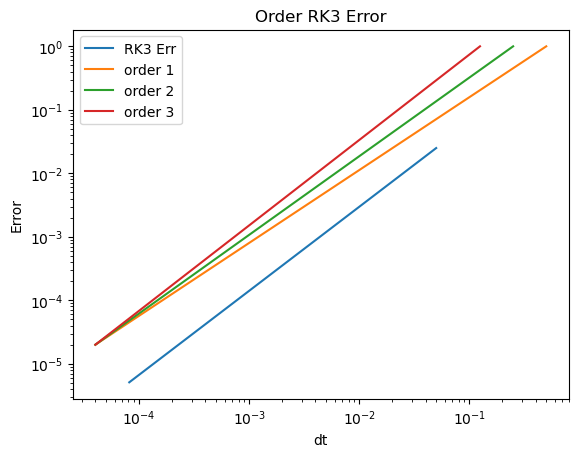

In [313]:
dts = np.arange(0,10,0.00002)
x1 = [[(1/i),dts[i]] for i in range(1,len(dts)-1)]
x2 = [[(1/i**2),dts[i]] for i in range(1,len(dts)-1)]
x3 = [[(1/i**3),dts[i]] for i in range(1,len(dts)-1)]

ax = plt.figure().add_subplot()
ax.loglog(err[0],err[1], label="RK3 Err")
ax.loglog(x1[1],x1[0], label="order 1")
ax.loglog(x2[1],x2[0], label="order 2")
ax.loglog(x3[1],x3[0], label="order 3")

plt.title("Order RK3 Error")
plt.xlabel("dt")
plt.ylabel("Error")
plt.legend()
plt.show()

In [300]:
x1 = []
dts = np.arange(0,10,0.00002)
x2=[]
x3 =[]
for i in range(len(dts)):
    x1.append([(1/(i+1)),dts[i]])
    x2.append([(1/((i+1)**2)),dts[i]])
    x3.append([(1/((i+1)**3)),dts[i]])

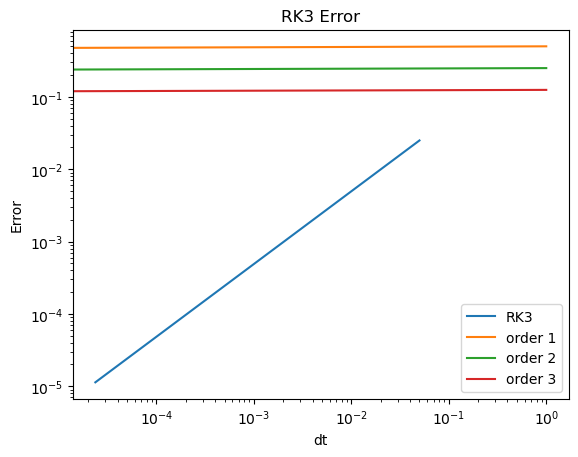

In [301]:
ax = plt.figure().add_subplot()
ax.loglog(err[0],err[1], label="RK3")
ax.loglog(x1[0],x1[1], label="order 1")
ax.loglog(x2[0],x2[1], label="order 2")
ax.loglog(x3[0],x3[1], label="order 3")

plt.title("RK3 Error")
plt.xlabel("dt")
plt.ylabel("Error")
plt.legend()
plt.show()

In [176]:
"""
Adams-Moulton 3 

Start with RK3(y0) -> RK3(RK3(y0)) -> u_k+2
"""

uk1=rk3singlestep(system,dt,t[0],y0)
uk2=rk3singlestep(system, dt, t[1],uk1)

Text(0.5, 1.0, 'Discrete time points for dt=0.1')

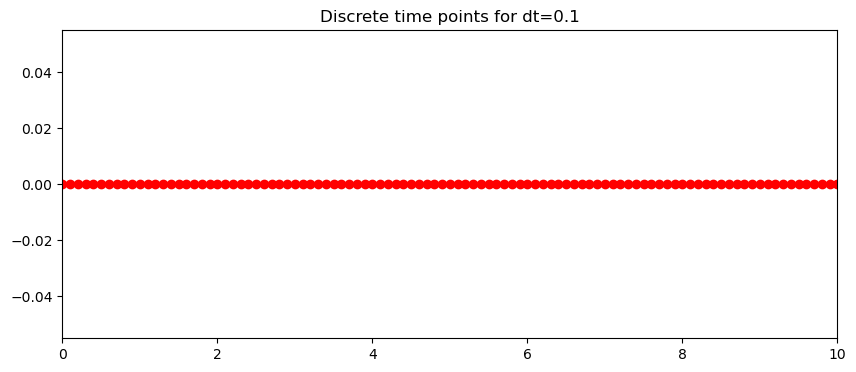

In [ ]:
dt = .1
T = 10
num_time_pts = int(T / dt)
t=np.arange(0,T+dt,dt)
fig = plt.figure(figsize=(10,4))
plt.plot(t,0*t,'o:',color='red')
plt.xlim((0,T))
plt.title('Discrete time points for dt=%s'%(dt))